<a href="https://colab.research.google.com/github/fa-a11-cmyk/DevOpsExam/blob/main/PM4PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pm4py


In [6]:
from IPython.display import display
import pandas as pd
import statistics
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
import pm4py


# ---------------------------------------------------
# 1️⃣ Charger le fichier de logs
# ---------------------------------------------------
dataframe = pd.read_csv("devops_mapped_log.csv")
dataframe["time:timestamp"] = pd.to_datetime(dataframe["time:timestamp"])
log = log_converter.apply(dataframe, variant=log_converter.Variants.TO_EVENT_LOG)


# ---------------------------------------------------
# 2️⃣ Découverte du DFG
# ---------------------------------------------------
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# Visualisation du DFG
gviz_dfg = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz_dfg)


# ---------------------------------------------------
# 3️⃣ Découverte du modèle de processus
# ---------------------------------------------------
process_model = pm4py.discovery.discover_process_tree_inductive(log)

# Exportation du modèle en BPMN
bpmn_model = pm4py.convert_to_bpmn(process_model)

# Génération du visuel BPMN
pm4py.vis.save_vis_bpmn(bpmn_model, "mon_process.png")  # Export en fichier
pm4py.vis.view_bpmn(bpmn_model)  # Visualisation Jupyter


# ---------------------------------------------------
# 4️⃣ KPIs du processus
# ---------------------------------------------------
case_durations = []
event_data = []
for case in log:
    timestamps = [event["time:timestamp"] for event in case]
    case_durations.append((max(timestamps) - min(timestamps)).total_seconds())
    for event in case:
        event_data.append({
            "case_id": case.attributes["concept:name"],
            "activity": event["concept:name"],
            "timestamp": event["time:timestamp"]
        })

count_cases = len(log)
average_cycle_time = statistics.mean(case_durations) if case_durations else 0
median_cycle_time = statistics.median(case_durations) if case_durations else 0
stdev_cycle_time = statistics.stdev(case_durations) if len(case_durations) > 1 else 0

# ---------------------------------------------------
# 5️⃣ KPI par activité
# ---------------------------------------------------
event_df = pd.DataFrame(event_data).sort_values(by=["case_id", "timestamp"])
event_df["next_timestamp"] = event_df.groupby("case_id")["timestamp"].shift(-1)
event_df["duration"] = (event_df["next_timestamp"] - event_df["timestamp"]).dt.total_seconds()
average_by_activity = event_df.groupby("activity")["duration"].mean().dropna()


# ---------------------------------------------------
# 6️⃣ Affichage des KPI
# ---------------------------------------------------
print("\n===== KPI du Processus =====")
print(f"👥 Nombre total de cas       : {count_cases}")
print(f"⏳ Temps de cycle moyen       : {average_cycle_time/60:.2f} minutes")
print(f"⏳ Temps de cycle médian      : {median_cycle_time/60:.2f} minutes")
print(f"📊 Écart-type du cycle        : {stdev_cycle_time/60:.2f} minutes\n")

print("\n⏱️ Temps moyen par activité : ")
for activity, avg_sec in average_by_activity.items():
    print(f"    - {activity}: {avg_sec/60:.2f} minutes")


FileNotFoundError: [Errno 2] No such file or directory: 'devops_mapped_log.csv'

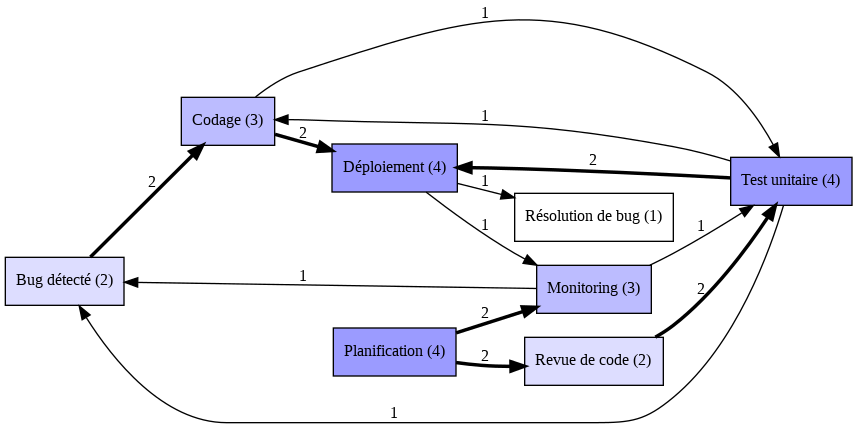

None

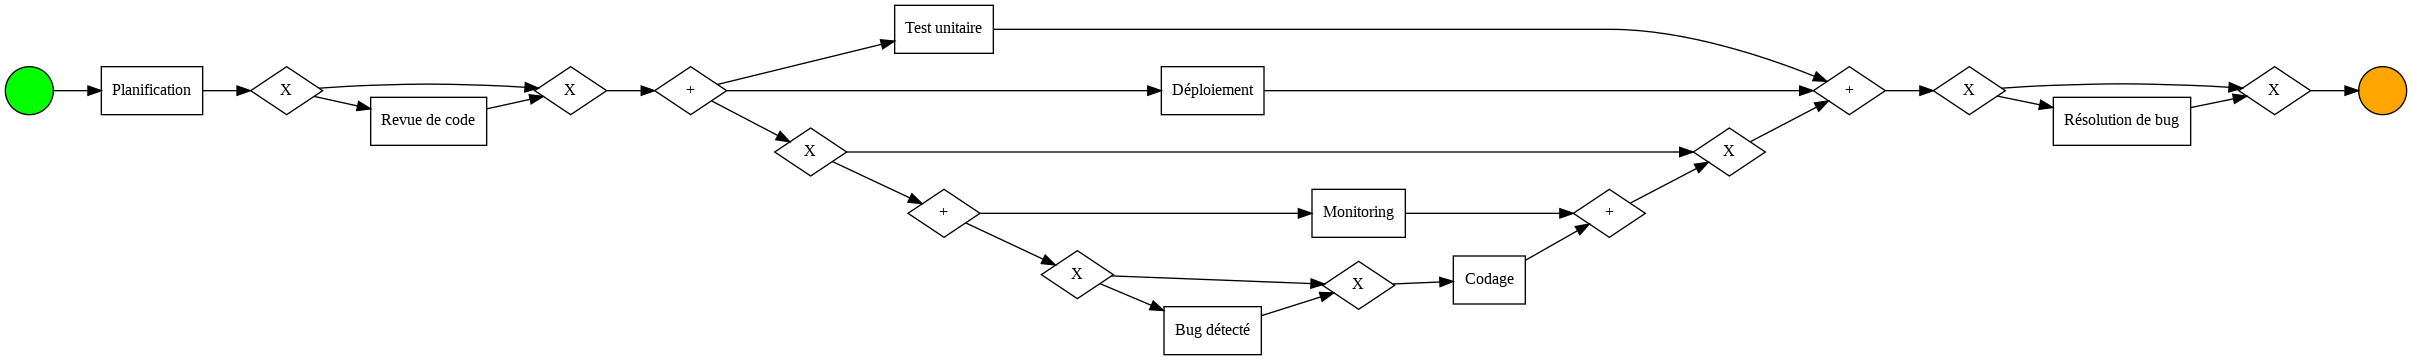

None


===== KPI du Processus =====
👥 Nombre total de cas        : 4
⏳ Temps de cycle moyen       : 2992.50 minutes
⏳ Temps de cycle médian      : 2970.00 minutes
📊 Écart-type du temps de cycle : 92.87 minutes

⏱️ Temps moyen par activité : 
    - Bug détecté: 210.00 minutes
    - Codage: 840.00 minutes
    - Déploiement: 600.00 minutes
    - Monitoring: 1365.00 minutes
    - Planification: 135.00 minutes
    - Revue de code: 1470.00 minutes
    - Test unitaire: 405.00 minutes


In [12]:
# ==========================================================
# ⚡️ COMPLETE PM4PY PROCESS MINING EXAMPLE
# ==========================================================
import pandas as pd
import statistics
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from IPython.display import display

# ==========================================================
# 📥 1️⃣ CHARGEMENT DU LOG
# ==========================================================
dataframe = pd.read_csv("devops_mapped_log.csv")  # Adapter le chemin
dataframe["time:timestamp"] = pd.to_datetime(dataframe["time:timestamp"])
log = log_converter.apply(dataframe, variant=log_converter.Variants.TO_EVENT_LOG)

# ==========================================================
# 🔍 2️⃣ DECOUVERTE DU DIRECTLY FOLLOWS GRAPH (DFG) + AFFICHAGE
# ==========================================================
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)
gviz_dfg = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)

# Afficher le DFG
display(dfg_visualizer.view(gviz_dfg))

# ==========================================================
# 🗺️ 3️⃣ DECOUVERTE DU MODELE DE PROCESSUS BPMN + AFFICHAGE
# ==========================================================
process_model = pm4py.discovery.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_model)

# Afficher le modèle BPMN
display(pm4py.vis.view_bpmn(bpmn_model))

# ==========================================================
# ⏳ 4️⃣ CALCUL DES KPI DU PROCESSUS
# ==========================================================
case_durations = []
event_data = []
for case in log:
    timestamps = [event["time:timestamp"] for event in case]
    case_durations.append((max(timestamps) - min(timestamps)).total_seconds())
    for event in case:
        event_data.append({
            "case_id": case.attributes["concept:name"],
            "activity": event["concept:name"],
            "timestamp": event["time:timestamp"]
        })

count_cases = len(log)
average_cycle_time = statistics.mean(case_durations) if case_durations else 0
median_cycle_time = statistics.median(case_durations) if case_durations else 0
stdev_cycle_time = statistics.stdev(case_durations) if len(case_durations) > 1 else 0

# ==========================================================
# ⏱️ 5️⃣ KPI PAR ACTIVITÉ
# ==========================================================
event_df = pd.DataFrame(event_data).sort_values(by=["case_id", "timestamp"])
event_df["next_timestamp"] = event_df.groupby("case_id")["timestamp"].shift(-1)
event_df["duration"] = (event_df["next_timestamp"] - event_df["timestamp"]).dt.total_seconds()
average_by_activity = event_df.groupby("activity")["duration"].mean().dropna()

# ==========================================================
# ✅ AFFICHAGE DES KPI
# ==========================================================
print("\n===== KPI du Processus =====")
print(f"👥 Nombre total de cas        : {count_cases}")
print(f"⏳ Temps de cycle moyen       : {average_cycle_time/60:.2f} minutes")
print(f"⏳ Temps de cycle médian      : {median_cycle_time/60:.2f} minutes")
print(f"📊 Écart-type du temps de cycle : {stdev_cycle_time/60:.2f} minutes\n")

print("⏱️ Temps moyen par activité : ")
for activity, avg_sec in average_by_activity.items():
    print(f"    - {activity}: {avg_sec/60:.2f} minutes")
